# Описание проекта
Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

## Изучение данных из файлов

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/datasets/games.csv') #откроем файл с данными и изучим общую информацию

In [3]:
df.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


**Для удобства названия всех столбцов приведем к нижнему регистру, и обработаем сами данные в столбцах.**

In [4]:
df = df.rename(columns={'Name':'name', 'Platform':'platform', 'Year_of_Release':'year_of_release', 'Genre':'genre',
                       'NA_sales':'na_sales', 'EU_sales':'eu_sales', 'JP_sales':'jp_sales', 'Other_sales':'other_sales', 
                       'Critic_Score':'critic_score', 'User_Score':'user_score', 'Rating':'rating'})#изменим наименование столбцов

In [5]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


## Подготовка данных

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null float64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


**Видим 2 пропуска в столбце с названиями игр, так как цель данного проекта выявление определяющих успешность игры закономерностей, то строки с отсутсвующими названиями игр - вообще теряют смысл для нас, такие значения невозможно заполнить, мы их удалим.**

In [7]:
df.dropna(subset=['name'], inplace=True) #удалим строки с пропущенными значениями в столбце name

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16713 non-null object
year_of_release    16444 non-null float64
genre              16713 non-null object
na_sales           16713 non-null float64
eu_sales           16713 non-null float64
jp_sales           16713 non-null float64
other_sales        16713 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


**В столбце rating у нас рейтинг от организации ESRB (англ. Entertainment Software Rating Board), в классификации которой есть аббревиатура "RP"(«Rating Pending» — «Рейтинг ожидается»), можно заполнить пропуски в этом столбце именно такой аббревиатурой, по сути будет означать то же, что и пропущенное значение - на данный момент рейтинг не известен.**

In [9]:
df['rating'] = df['rating'].fillna('RP')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16713 non-null object
year_of_release    16444 non-null float64
genre              16713 non-null object
na_sales           16713 non-null float64
eu_sales           16713 non-null float64
jp_sales           16713 non-null float64
other_sales        16713 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             16713 non-null object
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


**Заполним также пропуски в year_of_release, так как есть игры год выпуска которых пропущен на одной платформе, но при этом присутствует на другой платформе, то заполним эти пропуски медианным значением годов выпуска той платформы где год присутсвует.**

In [11]:
df_grouped = df.groupby(['platform'])['year_of_release'].median().round()

def func(row):
    if pd.isna(row['year_of_release']):
        return df_grouped.loc[row['platform']]
    return row['year_of_release']
 
df['year_of_release'] = df.apply(func, axis=1)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16713 non-null object
year_of_release    16713 non-null float64
genre              16713 non-null object
na_sales           16713 non-null float64
eu_sales           16713 non-null float64
jp_sales           16713 non-null float64
other_sales        16713 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             16713 non-null object
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


**Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.**

In [13]:
df['world_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

In [14]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,world_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,RP,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,RP,31.38


##  Исследовательский анализ данных

### Посмотрим, сколько игр выпускалось в разные годы.

In [15]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,world_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,RP,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,RP,31.38


In [16]:
df.groupby('year_of_release')['name'].count()

year_of_release
1980.0       9
1981.0      46
1982.0      53
1983.0      17
1984.0      14
1985.0      14
1986.0      21
1987.0      16
1988.0      15
1989.0      17
1990.0      16
1991.0      41
1992.0      43
1993.0      60
1994.0     121
1995.0     219
1996.0     263
1997.0     290
1998.0     386
1999.0     341
2000.0     350
2001.0     482
2002.0     829
2003.0     800
2004.0     783
2005.0     973
2006.0    1006
2007.0    1197
2008.0    1457
2009.0    1476
2010.0    1302
2011.0    1161
2012.0     653
2013.0     552
2014.0     582
2015.0     606
2016.0     502
Name: name, dtype: int64

**Резкий рост количества выпускаемых игр произошел в 1994 году, когда количество игр стало трехзначным числом, и до 2009 года был только рост, причем очень сильный, затем количество пошло на спад, но все равно числа достаточно большие, я бы не принимал во внимание вообще данные до 1994 года.**

### Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. 

In [17]:
df_platform = df.groupby('platform')['world_sales'].sum()

In [18]:
df_platform.sort_values(ascending=False)

platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
PS       730.86
GBA      317.85
PS4      314.14
PSP      294.05
PC       259.52
3DS      259.00
XB       257.74
GB       255.46
NES      251.05
N64      218.68
SNES     200.04
GC       198.93
XOne     159.32
2600      96.98
WiiU      82.19
PSV       54.07
SAT       33.59
GEN       28.35
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: world_sales, dtype: float64

In [19]:
df_pl = df_platform.sort_values(ascending=True).to_frame(name="sales").reset_index().tail(15)

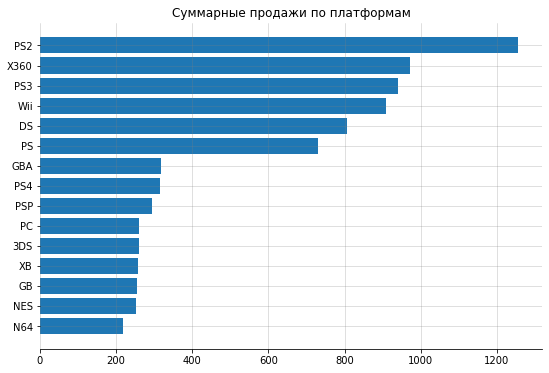

In [20]:
fig, ax = plt.subplots(figsize=(9, 6))
sns.despine(left=True)
ax.grid(color='grey', alpha=0.5, lw=0.5)
ax.barh(width=df_pl['sales'], y=df_pl['platform'])
ax.set_title("Суммарные продажи по платформам");

In [21]:
df_pivot_platform = df.pivot_table(index='platform', values='world_sales', aggfunc='sum')

In [22]:
df_pivot_platform.query('world_sales >= 400')

,world_sales
platform,
DS,806.12
PS,730.86
PS2,1255.77
PS3,939.65
Wii,907.51
X360,971.42


In [23]:
list_of_required_types = ["DS", "PS", "PS2", "PS3", "Wii", "X360"]

In [24]:
df[df['platform'].isin(list_of_required_types)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,world_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E,82.54
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E,32.77
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
...,...,...,...,...,...,...,...,...,...,...,...,...
16700,Mezase!! Tsuri Master DS,DS,2009.0,Sports,0.00,0.00,0.01,0.00,NaN,NaN,RP,0.01
16704,Plushees,DS,2008.0,Simulation,0.01,0.00,0.00,0.00,NaN,tbd,E,0.01
16709,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,0.00,0.00,0.00,0.00,NaN,NaN,RP,0.00
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,RP,0.01


In [25]:
import matplotlib.pyplot as plt

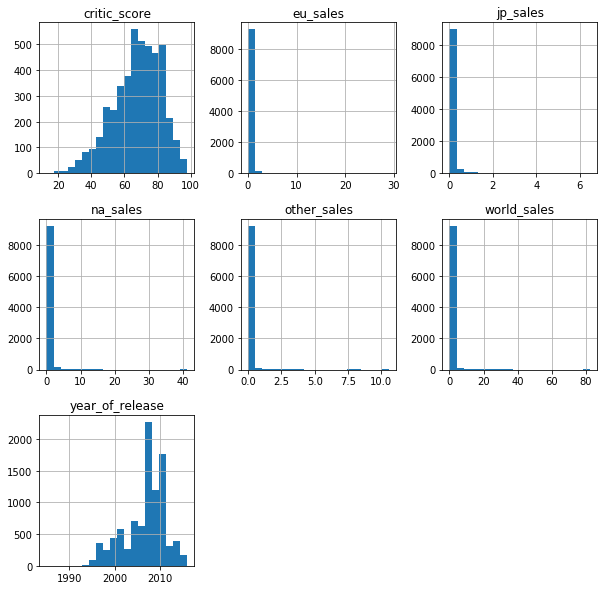

In [26]:
df[df['platform'].isin(list_of_required_types)].hist(bins=20, figsize=(10, 10))
plt.show()

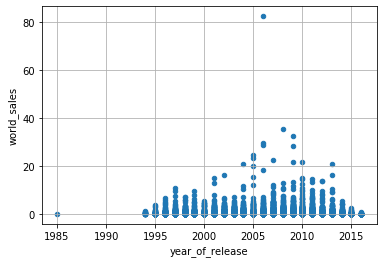

In [27]:
df[df['platform'].isin(list_of_required_types)].plot(x='year_of_release', y='world_sales', kind='scatter', grid=True)
plt.show()

**По графикам видно, что действительно основные продажи сосредоточены на 9 крупных платформах, также можно заметить, что с 1995 по 2008 год был сильный рост продаж, достигший пика и как видно на диаграмме рассеяния - выбивающего значения именно в 2007-2008 году, затем продажи пошли на спад.**

### Возьмем данные за соответствующий актуальный период. Актуальный период обозначим с 2010 по 2016, так как до этого был слишком выдающийся рост, а после 2010 продажи достаточно равномерные. Так как нам надо построить прогноз на 2017 год, то не будем  учитывать в работе данные за предыдущие годы(до актуального периода). Выясним какие платформы лидируют по продажам, растут или падают? Выберем несколько потенциально прибыльных платформ.

In [28]:
df_top = df.query('platform in ["DS", "PS", "PS2", "PS3", "Wii", "X360"] and year_of_release >= 2010')

In [29]:
df_top_1 = df_top.pivot_table(index=['platform','year_of_release'], values='name', aggfunc='count')

In [30]:
df_top_1

name
platform year_of_release      
DS       2010.0            323
         2011.0            153
         2012.0             23
         2013.0              8
PS2      2010.0             38
         2011.0              7
PS3      2010.0            181
         2011.0            240
         2012.0            148
         2013.0            126
         2014.0            108
         2015.0             73
         2016.0             38
Wii      2010.0            253
         2011.0            143
         2012.0             31
         2013.0             12
         2014.0              6
         2015.0              4
         2016.0              1
X360     2010.0            212
         2011.0            206
         2012.0            106
         2013.0             75
         2014.0             63
         2015.0             35
         2016.0             13

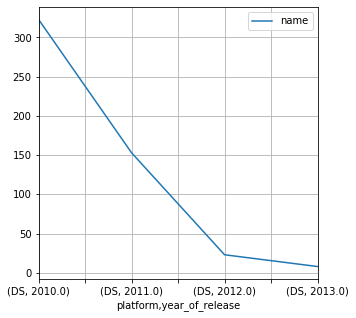

In [31]:
df_top_1.query('platform == "DS"').plot(style='-', grid=True, figsize=(5,5))
plt.show()

**Платформа DS уже не представляет интереса для 2017 года. С самого появления платформы, продажи шли на спад с каждый годом, и после 2013 игры уже не выпускались.**

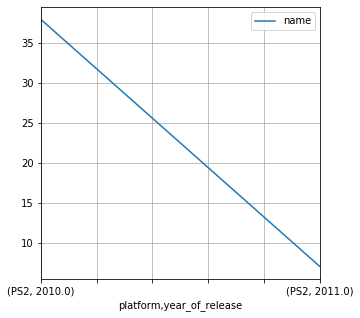

In [32]:
df_top_1.query('platform == "PS2"').plot(style='-', grid=True, figsize=(5,5))
plt.show()

**Платформа PS2 просуществовала всего год, и она уже не представляет интереса для 2017 года.**

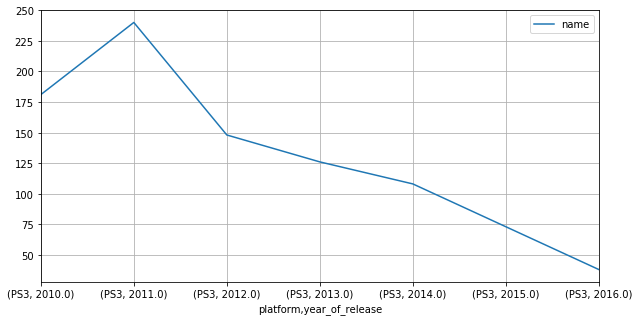

In [33]:
df_top_1.query('platform == "PS3"').plot(style='-', grid=True, figsize=(10,5))
plt.show()

**У платформы PS3 были высокие продажи с появления в 2010 и до 2012, с пиком в 2011, далее продажи шли на спад. Данные по этой платформе подходят для анализа, так как игры выпускаются до сих пор.** 

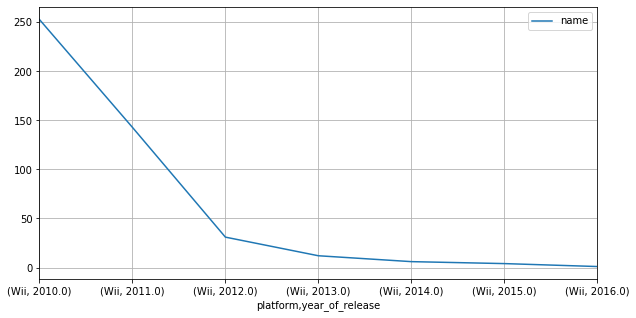

In [34]:
df_top_1.query('platform == "Wii"').plot(style='-', grid=True, figsize=(10,5))
plt.show()

**Данные платформы Wii актуальны, продажи падали с 2010 по 2012, далее спад намного слабее.** 

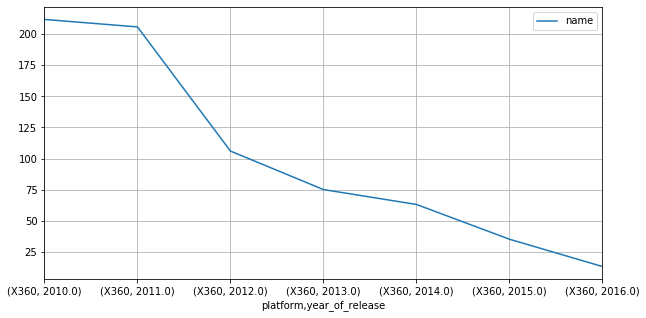

In [35]:
df_top_1.query('platform == "X360"').plot(style='-', grid=True, figsize=(10,5))
plt.show()

**Судя по графику, у платформы Х360 спад начался через год после появления на рынке, и продолжался до 2016, данные до сих пор актуальны.**

In [36]:
df_top

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,world_sales
14,Kinect Adventures!,X360,2010.0,Misc,15.00,4.89,0.24,1.69,61.0,6.3,E,21.82
16,Grand Theft Auto V,PS3,2013.0,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013.0,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
27,Pokemon Black/Pokemon White,DS,2010.0,Role-Playing,5.51,3.17,5.65,0.80,NaN,NaN,RP,15.13
29,Call of Duty: Modern Warfare 3,X360,2011.0,Shooter,9.04,4.24,0.13,1.32,88.0,3.4,M,14.73
...,...,...,...,...,...,...,...,...,...,...,...,...
16649,Real Crimes: The Unicorn Killer,DS,2011.0,Puzzle,0.00,0.01,0.00,0.00,NaN,NaN,RP,0.01
16654,Ben 10 Omniverse 2,X360,2013.0,Action,0.00,0.01,0.00,0.00,NaN,5.1,E10+,0.01
16674,Tsukigime Ranko's Longest Day,PS3,2014.0,Action,0.00,0.01,0.00,0.00,NaN,NaN,RP,0.01
16691,Dynasty Warriors: Eiketsuden,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,RP,0.01


In [37]:
df_top.groupby('platform')['world_sales'].sum().sort_values(ascending=False)

platform
PS3     596.05
X360    560.59
Wii     222.97
DS      123.75
PS2       6.09
Name: world_sales, dtype: float64

In [38]:
df_top_bar = pd.DataFrame({
    "platform": ["PS3", "X360", "Wii", "DS", "PS2"],
    "world_sales": [596.05, 560.59, 222.97, 123.75, 6.09]
}).sort_values(by="world_sales")

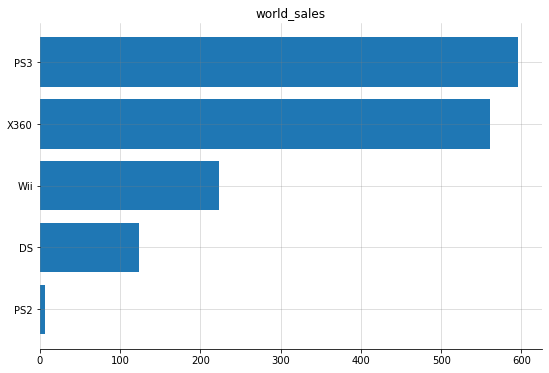

In [39]:
fig, ax = plt.subplots(figsize=(9, 6))
sns.despine(left=True)
ax.grid(color='grey', alpha=0.5, lw=0.5)
ax.barh(width=df_top_bar['world_sales'], y=df_top_bar['platform'])
ax.set_title('world_sales');

**Обратим внимание что платформы "GBA" и "PS" после 2010 года уже не встречаются, а лидируют по продажам с большим отрывом PS3 и X360. В целом самые топовые несколько платформ PS3, X360, PS4, Wii, DS      .**

In [40]:
df_top_pivot = df_top.pivot_table(index=['platform', 'year_of_release'], values='world_sales', aggfunc='sum')

In [41]:
df_top_pivot

world_sales
platform year_of_release             
DS       2010.0                 85.02
         2011.0                 26.18
         2012.0                 11.01
         2013.0                  1.54
PS2      2010.0                  5.64
         2011.0                  0.45
PS3      2010.0                142.17
         2011.0                165.09
         2012.0                107.36
         2013.0                113.25
         2014.0                 47.76
         2015.0                 16.82
         2016.0                  3.60
Wii      2010.0                127.95
         2011.0                 59.65
         2012.0                 21.71
         2013.0                  8.59
         2014.0                  3.75
         2015.0                  1.14
         2016.0                  0.18
X360     2010.0                180.21
         2011.0                143.84
         2012.0                 99.74
         2013.0                 88.58
         2014.0                 34.74
         2015.0                 11.96
         2016.0                  1.52

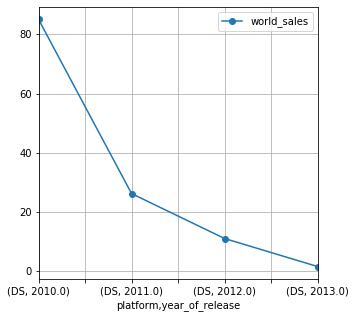

In [42]:
df_top_pivot.query('platform == "DS"').plot(style='o-', grid=True, figsize=(5,5))
plt.show()

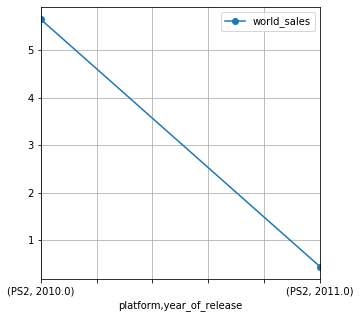

In [43]:
df_top_pivot.query('platform == "PS2"').plot(style='o-', grid=True, figsize=(5,5))
plt.show()

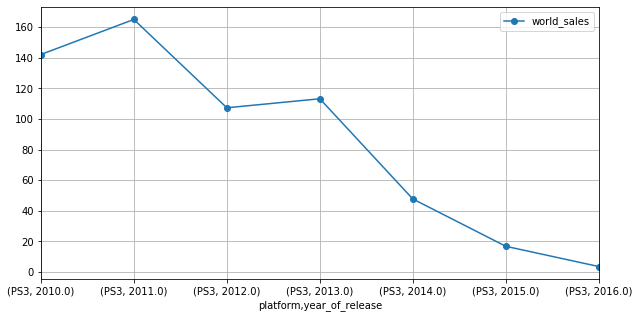

In [44]:
df_top_pivot.query('platform == "PS3"').plot(style='o-', grid=True, figsize=(10,5))
plt.show()

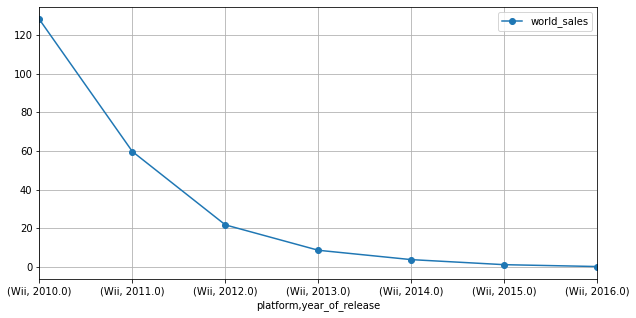

In [45]:
df_top_pivot.query('platform == "Wii"').plot(style='o-', grid=True, figsize=(10,5))
plt.show()

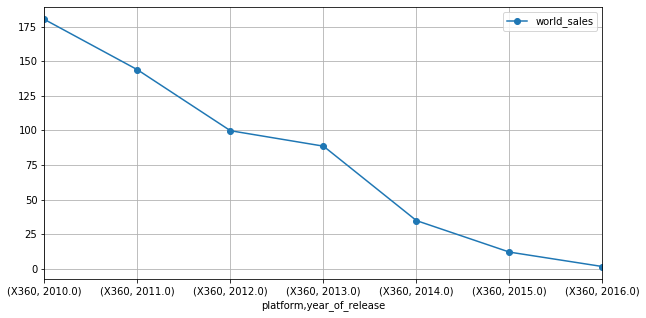

In [46]:
df_top_pivot.query('platform == "X360"').plot(style='o-', grid=True, figsize=(10,5))
plt.show()

**В целом продажи всех платформ падали последние годы, а платформа DS ушла с рынка после 2013 года, PS2 после 2011, PSP после 2015.**

### Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам и опишем результат.

In [47]:
import seaborn as sns

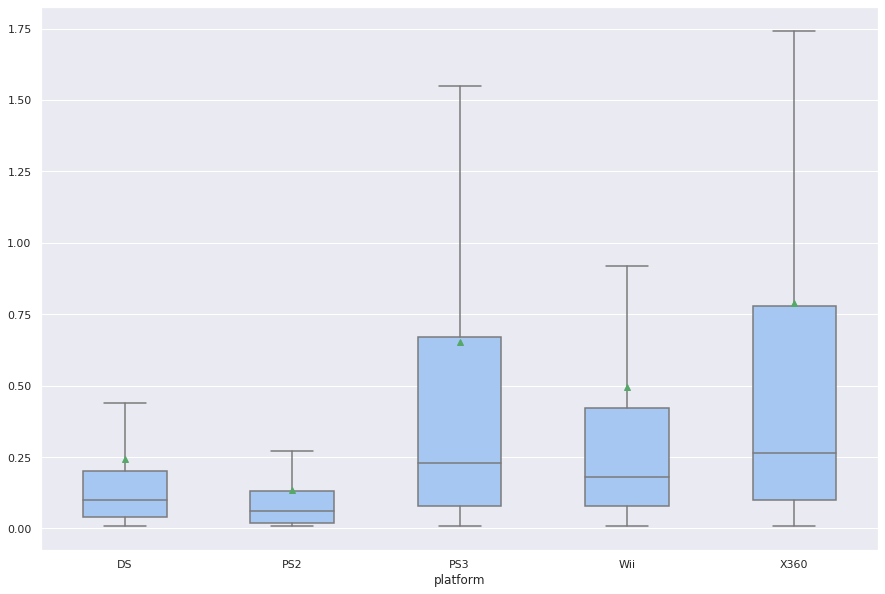

In [48]:
world_sales_platform = df_top.pivot_table(index='name', columns='platform', values='world_sales', aggfunc='sum')
sns.set(rc={'figure.figsize':(15,10)})
sns.boxplot(data=world_sales_platform, showfliers=False, showmeans=True, color='#98C6FF', width=0.5)
plt.show()

In [49]:
world_sales_platform.describe()

platform,DS,PS2,PS3,Wii,X360
count,507.000000,45.000000,913.000000,450.000000,710.000000
mean,0.244083,0.135333,0.652848,0.495489,0.789563
std,0.815643,0.180638,1.442542,1.118375,1.784875
min,0.010000,0.010000,0.010000,0.010000,0.010000
25%,0.040000,0.020000,0.080000,0.080000,0.100000
50%,0.100000,0.060000,0.230000,0.180000,0.265000
75%,0.200000,0.130000,0.670000,0.420000,0.780000
max,15.130000,0.760000,21.050000,10.120000,21.820000


**Лидеры по продажам все те же PS3 и X360. Средние значения по этим платформам - значительно опережают остальные.**

### Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. 

In [50]:
df_top['critic_score'] = pd.to_numeric(df_top['critic_score'], errors='coerce') #изменим тип данных на float чтобы построить диаграмму рассеяния
df_top['user_score'] = pd.to_numeric(df_top['user_score'], errors='coerce')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


**Возьмем самую популярную платформу X360**

In [51]:
df_top.query('platform == "X360"')['world_sales'].corr(df_top.query('platform == "X360"')['critic_score']) #корреляция между оценкой критиков и продажами

0.3420583244081178

**Смотря на коэффициент корреляции можно сделать вывод, что зависимость прямая и достаточно сильная, чем выше оценка критиков тем выше продажи.**

In [52]:
df_top.query('platform == "X360"')['world_sales'].corr(df_top.query('platform == "X360"')['user_score'])

0.06526685620128808

**Смотря на коэффициент корреляции между оценкой пользователей и продажами, можно сделать вывод, что присутсвует хоть и прямая, но очень слабая зависимость.**

**Рассчитаем коэффициенты корреляции между продажами и оценками критиков и пользователей, для платформы DS.**

In [53]:
df_top.query('platform == "DS"')['world_sales'].corr(df_top.query('platform == "DS"')['critic_score'])

0.2801624634637196

In [54]:
df_top.query('platform == "DS"')['world_sales'].corr(df_top.query('platform == "DS"')['user_score'])

0.25142811742297444

**Можно заметить что прямая связь с оценками критиков также сильная, как и в случае с Х360, и в этом случае присутсвует еще прямая и достаточно сильная связь с оценками пользователей.**

In [55]:
df_top.query('platform == "PS3"')['world_sales'].corr(df_top.query('platform == "PS3"')['critic_score'])

0.3999945061878434

In [56]:
df_top.query('platform == "PS3"')['world_sales'].corr(df_top.query('platform == "PS3"')['user_score'])

0.06312033109536262

**Для платформы PS3 сильная корреляция с оценками критиков, и очень слабая зависимость от оценок пользователей.**

In [57]:
df_top.query('platform == "Wii"')['world_sales'].corr(df_top.query('platform == "Wii"')['critic_score'])

0.31058771048209965

In [58]:
df_top.query('platform == "Wii"')['world_sales'].corr(df_top.query('platform == "Wii"')['user_score'])

0.14715977707531702

**Для платформы Wii зависимость от оценик критиков высокая, от оценки пользовательей достаточно слабая.**

**В целом можно утверждать, что для всех платформ характерна бОльшая зависимость именно от оценок критиков.**

### Посмотрим на  распределение игр по жанрам. 

In [59]:
df_top.groupby('genre')['world_sales'].sum().sort_values(ascending=False)

genre
Action          415.47
Shooter         295.33
Sports          219.47
Misc            190.62
Role-Playing    127.99
Racing           73.60
Platform         54.15
Fighting         47.10
Adventure        35.06
Simulation       26.46
Puzzle           13.07
Strategy         11.13
Name: world_sales, dtype: float64

**Можно с уверенностью сказать, что самый прибыльный жанр - это Action, за ним с существенным отставанием идут Shooter, Sports, Misc, Role-Playing, остальные жанры еще более существенно отстают, самые низкие продажи у Puzzle и Strategy.** 

In [60]:
df_top.groupby('genre')['name'].count().sort_values(ascending=False)

genre
Action          670
Misc            393
Sports          379
Shooter         239
Adventure       193
Role-Playing    182
Racing          142
Simulation      116
Fighting        114
Platform         74
Puzzle           72
Strategy         52
Name: name, dtype: int64

**Как и в продажах в распределении игр по жанрам снова лидирует жанр Action, за ним опять с существенным отставанием идут Sports, Misc, Adventure, Role-Playing, Shooter.** 

## Составим портрет пользователя каждого региона. Для этого, для пользователя каждого региона (NA, EU, JP):


### Определим самые популярные платформы (топ-5):

In [61]:
df.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head()

platform
X360    602.47
PS2     583.84
Wii     496.90
PS3     393.49
DS      382.40
Name: na_sales, dtype: float64

In [62]:
df.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head()

platform
PS2     339.29
PS3     330.29
X360    270.76
Wii     262.21
PS      213.61
Name: eu_sales, dtype: float64

In [63]:
df.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head()

platform
DS      175.57
PS      139.82
PS2     139.20
SNES    116.55
3DS     100.67
Name: jp_sales, dtype: float64

**Можно заметить, что Х360 не популярна только в Японии, тогда как в Северной Америке является самой популярной платформой. В целом можно сказать что В Северной Америке и Европе популярны практически одни и те же платформы, тогда как в Японии своеобразный набор популярных платформ. Самая же популярная платформа это PS2 она присутсвует во всех ТОП-5, в Европе на первом месте, в Северной Америке на втором, а в Японии на третьем.**

### Самые популярные жанры (топ-5):

In [64]:
df.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head()

genre
Action      879.01
Sports      684.43
Shooter     592.24
Platform    445.50
Misc        407.27
Name: na_sales, dtype: float64

In [65]:
df.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head()

genre
Action     519.13
Sports     376.79
Shooter    317.34
Racing     236.51
Misc       212.74
Name: eu_sales, dtype: float64

In [66]:
df.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head()

genre
Role-Playing    355.41
Action          161.43
Sports          135.54
Platform        130.83
Misc            108.11
Name: jp_sales, dtype: float64

**ТОП-5 самых популярных жанров в Европе и Северной Америке практически польностью совпадают за исключением Platform и Racing, и в целом во всех трех рейтингах представлены одни и те же жанры, единственне что в Японии самый популярный жанр Role-Playing - больше нигде не представлен.**

### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [67]:
print(df['rating'].unique())# посмотрим какие рейтинги встречаются в таблице

['E' 'RP' 'M' 'T' 'E10+' 'K-A' 'AO' 'EC']


***«E» («Everyone») — «Для всех»: Содержание вполне подходит для возрастной категории от 6 лет.***

***«RP» («Rating Pending») — «Рейтинг ожидается»: Продукт был отправлен в ESRB и ожидает присвоения рейтинга.***

***«M» («Mature») — «Для взрослых»: Материалы игры не подходят для подростков младше 17 лет.***

***«T» («Teen») — «Подросткам»: Игра подходит для лиц от 13 лет.***

***«E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше».***

***«К-А»(«for Kids to Adults»)- для детей и взрослых: Игры, содержащие контент, подходящий для широкой аудитории. Этот рейтинг использовался до 1998 года, когда он был переименован в «E».***

***«AO» («Adults Only 18+») — «Только для взрослых»: Содержание игры только для взрослых старше 18 лет.***

***«EC» («Early childhood») — «Для детей младшего возраста»: Игра подходит для детей от 3 лет.***

In [68]:
df.groupby('rating')['na_sales'].sum().sort_values(ascending=False)

rating
E       1292.99
RP      1240.68
T        759.75
M        748.48
E10+     353.32
K-A        2.56
EC         1.53
AO         1.26
Name: na_sales, dtype: float64

In [69]:
df.groupby('rating')['eu_sales'].sum().sort_values(ascending=False)

rating
E       710.25
RP      613.38
M       483.97
T       427.03
E10+    188.52
AO        0.61
K-A       0.27
EC        0.11
Name: eu_sales, dtype: float64

In [70]:
df.groupby('rating')['jp_sales'].sum().sort_values(ascending=False)

rating
RP      841.93
E       198.11
T       151.40
M        64.24
E10+     40.20
K-A       1.46
EC        0.00
AO        0.00
Name: jp_sales, dtype: float64

**В целом для всех регионов ситуация с рейтингами похожая, во всех трех выборках самые популярные индексы рейтинга - "Е" и "Т", а самые непопулярные - "ЕС" и "АО". Также большими продажами сильно выдялется во всех трех регионах рейтинг - "RP".**

## Проверка гипотез.

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

**Сформулируем нулевую(Н0) и альтернативную(Н1) гипотезы:**

Н0 - средние пользовательские рейтинги платформ Xbox One и PC - равны.                                                           
Н1 - средние пользовательские рейтинги платформ Xbox One и PC - различаются.

**Для проверки гипотез будем использовать t-тест, зададим пороговое значение alpha=0.05**

In [71]:
from scipy import stats as st

In [72]:
df['critic_score'] = pd.to_numeric(df['critic_score'], errors='coerce') #изменим тип данных на float чтобы рабоать с данными
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')

In [73]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,world_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,RP,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,RP,31.38


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 12 columns):
name               16713 non-null object
platform           16713 non-null object
year_of_release    16713 non-null float64
genre              16713 non-null object
na_sales           16713 non-null float64
eu_sales           16713 non-null float64
jp_sales           16713 non-null float64
other_sales        16713 non-null float64
critic_score       8137 non-null float64
user_score         7590 non-null float64
rating             16713 non-null object
world_sales        16713 non-null float64
dtypes: float64(8), object(4)
memory usage: 1.7+ MB


In [75]:
alpha = 0.05
results_df_platform = st.ttest_ind(df[df['platform'] == 'PC']['user_score'], df[df['platform'] == 'XOne']['user_score'],  nan_policy='omit')
print('p-значение:', results_df_platform.pvalue)
if results_df_platform.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 1.3896435533545967e-05
Отвергаем нулевую гипотезу


**Судя по данным средние пользовательские рейтинги платформ Xbox One и PC различаются, и мы отвергаем нулевую гипотезу.**

### Средние пользовательские рейтинги жанров Action и Sports - разные.

**Сформулируем нулевую(Н0) и альтернативную(Н1) гипотезы:**

Н0 - средние пользовательские рейтинги жанров Action и Sports -равны.                                                           
Н1 - средние пользовательские рейтинги жанров Action и Sports - разные.

In [76]:
alpha = 0.05
results_df_genre = st.ttest_ind(df[df['genre'] == 'Action']['user_score'], df[df['genre'] == 'Sports']['user_score'], nan_policy='omit')
print('p-значение:', results_df_genre.pvalue)
if results_df_genre.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.10406951359035752
Не получилось отвергнуть нулевую гипотезу


**Судя по данным средние пользовательские рейтинги жанров Action и Sports - равны, не получилось отвергунть нулевую гипотезу.**

## Общий вывод.

**Так как цель работы была в том, чтобы определить определяющие успешность игры закономерности, то можно сказать следующее:**

1) Самый успешный в плане продаж жанр однозначно Action, после него уже с существенным отстованием идут Sports и Shooter, и исключительно для Японии выделяется жанр Role-Playing.

2) Самая популярная платформа - это PS2, но для нее уже не выпускают игры с 2012 года, а вот актуальные и максимально популярные платформы это Х360, PS3 и Wii, в Японии еще выделяется DS.

3) Можно сказать, что пользовательская оценка практически не влияет на популярность игры, тогда как оценка критиков имеет прямую корреляцию с продажами.

4) Самые большие продажи показывают игры с рейтингами "Е", "Т" и "RP" по версии ESRB.